# Provisional COVID-19 Death Counts by Week Ending Date and State 

A nice site for searching data sets: `https://data.world/search`

COVID section: `https://data.world/resources/coronavirus/`

Dataset from `https://www.cdc.gov/nchs/covid19/covid-19-mortality-data-files.htm`

NVSS Provisional COVID-19 Deaths by Place of Death and Age

`https://data.cdc.gov/dataset/NVSS-Provisional-COVID-19-Deaths-by-Place-of-Death/4va6-ph5s`

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_json('https://data.cdc.gov/resource/4va6-ph5s.json')
df.shape

(1000, 14)

In [44]:
df.sample(10)

,data_as_of,start_week,end_week,hhs_region,state,place_of_death,age_group,covid_19_deaths,total_deaths,pneumonia,pneumonia_and_covid,influenza_deaths,pneumonia_influenza_or_covid,footnote
545,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,2,New York City,Hospice facility,45-64 years,0.0,71.0,0.0,0.0,0.0,0.0,NaN
304,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,1,Rhode Island,"Healthcare setting, inpatient",65-74 years,107.0,390.0,88.0,61.0,NaN,137.0,One or more data cells have counts between 1–9...
116,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,1,Maine,Decedent's home,15-44 years,NaN,244.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1–9...
931,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,4,Alabama,"Healthcare setting, inpatient",15-44 years,92.0,674.0,103.0,41.0,NaN,159.0,One or more data cells have counts between 1–9...
213,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,1,Massachusetts,Nursing home/longterm care facility,All ages,3502.0,11381.0,1139.0,684.0,14.0,3969.0,NaN
370,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,1,Vermont,"Healthcare setting, outpatient or emergency room",85 years and over,0.0,32.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1–9...
828,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,3,Virginia,"Healthcare setting, outpatient or emergency room",85 years and over,20.0,361.0,23.0,NaN,NaN,40.0,One or more data cells have counts between 1–9...
630,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,3,District of Columbia,Decedent's home,0-14 years,0.0,NaN,0.0,0.0,0.0,0.0,One or more data cells have counts between 1–9...
560,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,2,New York City,Other,65-74 years,11.0,96.0,NaN,NaN,NaN,13.0,One or more data cells have counts between 1–9...
100,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,1,Connecticut,Other,0-14 years,0.0,NaN,0.0,0.0,0.0,0.0,One or more data cells have counts between 1–9...


In [42]:
xxx = np.loadtxt('./columns.txt', dtype=str, delimiter='\n')
xxx = np.array([x.replace('\t','') for x in xxx])  # replace tabs
xxx = pd.DataFrame( np.reshape(xxx, (-1,3)), columns = ['short_desc','long_desc','type'] )
xxx["un_nums"] = pd.Series([df[c].unique().size for c in df.columns])
xxx.set_index(df.columns)

,short_desc,long_desc,type,un_nums
data_as_of,Data as of,Date of analysis,Date & Time,1
start_week,Start week,First week-ending date of data period,Date & Time,1
end_week,End Week,Last week-ending date of data period,Date & Time,1
hhs_region,HHS Region,HHS Region,Number,5
state,State,Jurisdiction of Occurrence,Plain Text,19
place_of_death,Place of Death,Place of death,Plain Text,9
age_group,Age group,Age group,Plain Text,7
covid_19_deaths,COVID-19 Deaths,Deaths involving COVID-19 (ICD-code U07.1),Number,285
total_deaths,Total Deaths,Deaths from all causes of death,Number,608
pneumonia,Pneumonia Deaths,Pneumonia Deaths (ICD-10 codes J12.0-J18.9),Number,274


In [46]:
df['age_group'].unique()

array(['All ages', '0-14 years', '15-44 years', '45-64 years',
       '65-74 years', '75-84 years', '85 years and over'], dtype=object)

In [53]:
df.value_counts('age_group')

age_group
All ages             160
85 years and over    140
75-84 years          140
65-74 years          140
45-64 years          140
15-44 years          140
0-14 years           140
dtype: int64

In [56]:
df[ (df['age_group'] == '15-44 years') & (df['state'] == 'United States')]

,data_as_of,start_week,end_week,hhs_region,state,place_of_death,age_group,covid_19_deaths,total_deaths,pneumonia,pneumonia_and_covid,influenza_deaths,pneumonia_influenza_or_covid,footnote
2,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Decedent's home,15-44 years,760.0,45651.0,557.0,121.0,106.0,1262.0,NaN
9,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,"Healthcare setting, dead on arrival",15-44 years,15.0,1404.0,6.0,1.0,0.0,20.0,NaN
16,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,"Healthcare setting, inpatient",15-44 years,4605.0,35309.0,4884.0,2371.0,308.0,7419.0,NaN
23,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,"Healthcare setting, outpatient or emergency room",15-44 years,501.0,20584.0,395.0,122.0,31.0,805.0,NaN
30,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Hospice facility,15-44 years,21.0,2464.0,83.0,7.0,2.0,99.0,NaN
37,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Nursing home/longterm care facility,15-44 years,63.0,1228.0,86.0,19.0,1.0,131.0,NaN
44,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Other,15-44 years,117.0,34544.0,169.0,31.0,7.0,261.0,NaN
51,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Place of death unknown,15-44 years,3.0,405.0,1.0,0.0,0.0,4.0,NaN


In [67]:
df.describe()

,hhs_region,covid_19_deaths,total_deaths,pneumonia,pneumonia_and_covid,influenza_deaths,pneumonia_influenza_or_covid
count,1000.00000,775.000000,8.860000e+02,757.000000,777.000000,717.000000,761.000000
mean,2.05600,1255.967742,1.044596e+04,1205.391017,551.131274,41.104603,1946.214192
std,1.11898,9455.975467,8.512866e+04,9852.901859,4542.061585,316.812986,15030.298665
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.00000,0.000000,4.900000e+01,0.000000,0.000000,0.000000,0.000000
50%,2.00000,18.000000,3.790000e+02,22.000000,0.000000,0.000000,38.000000
75%,3.00000,138.000000,1.962500e+03,126.000000,39.000000,0.000000,247.000000
max,4.00000,203051.000000,2.203549e+06,207690.000000,92096.000000,6722.000000,324366.000000


In [70]:
ddd = df[ (df['age_group'] == '15-44 years') & (df['state'] == 'United States')]

In [71]:
ddd

,data_as_of,start_week,end_week,hhs_region,state,place_of_death,age_group,covid_19_deaths,total_deaths,pneumonia,pneumonia_and_covid,influenza_deaths,pneumonia_influenza_or_covid,footnote
2,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Decedent's home,15-44 years,760.0,45651.0,557.0,121.0,106.0,1262.0,NaN
9,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,"Healthcare setting, dead on arrival",15-44 years,15.0,1404.0,6.0,1.0,0.0,20.0,NaN
16,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,"Healthcare setting, inpatient",15-44 years,4605.0,35309.0,4884.0,2371.0,308.0,7419.0,NaN
23,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,"Healthcare setting, outpatient or emergency room",15-44 years,501.0,20584.0,395.0,122.0,31.0,805.0,NaN
30,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Hospice facility,15-44 years,21.0,2464.0,83.0,7.0,2.0,99.0,NaN
37,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Nursing home/longterm care facility,15-44 years,63.0,1228.0,86.0,19.0,1.0,131.0,NaN
44,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Other,15-44 years,117.0,34544.0,169.0,31.0,7.0,261.0,NaN
51,2020-10-14T00:00:00.000,2020-02-01T00:00:00.000,2020-10-10T00:00:00.000,0,United States,Place of death unknown,15-44 years,3.0,405.0,1.0,0.0,0.0,4.0,NaN


In [72]:
pd.DataFrame(ddd.describe().loc['mean']).astype(int)

,mean
hhs_region,0
covid_19_deaths,760
total_deaths,17698
pneumonia,772
pneumonia_and_covid,334
influenza_deaths,56
pneumonia_influenza_or_covid,1250


In [98]:
total_df = df.groupby(['age_group']).sum()
total_df


,hhs_region,covid_19_deaths,total_deaths,pneumonia,pneumonia_and_covid,influenza_deaths,pneumonia_influenza_or_covid
age_group,,,,,,,
0-14 years,288,74.0,23218.0,316.0,12.0,111.0,508.0
15-44 years,288,8347.0,180946.0,7939.0,3562.0,520.0,13286.0
45-64 years,288,52757.0,539802.0,50108.0,24789.0,2439.0,79961.0
65-74 years,288,63497.0,569756.0,62467.0,30181.0,1919.0,97325.0
75-84 years,288,78789.0,698994.0,77480.0,36097.0,1934.0,121831.0
85 years and over,288,93268.0,876182.0,84361.0,36649.0,1816.0,142558.0
All ages,328,676643.0,6366226.0,629810.0,296939.0,20733.0,1025600.0


In [107]:
def mean_age(a):
    return sum([float(x) for x in a.split()[0].split("-")])/2

In [106]:
sum([float(x) for x in "0-14 years".split()[0].split("-")])/2

7.0

In [ ]:
total_df["co"]

In [101]:
total_df[["covid_19_deaths", "pneumonia", "influenza_deaths"]]

,covid_19_deaths,pneumonia,influenza_deaths
age_group,,,
0-14 years,74.0,316.0,111.0
15-44 years,8347.0,7939.0,520.0
45-64 years,52757.0,50108.0,2439.0
65-74 years,63497.0,62467.0,1919.0
75-84 years,78789.0,77480.0,1934.0
85 years and over,93268.0,84361.0,1816.0
All ages,676643.0,629810.0,20733.0


In [121]:
tdf.columns

Index(['age_group', 'hhs_region', 'covid_19_deaths', 'total_deaths',
       'pneumonia', 'pneumonia_and_covid', 'influenza_deaths',
       'pneumonia_influenza_or_covid'],
      dtype='object')

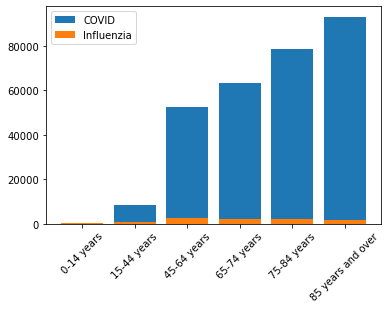

In [130]:
tdf = total_df.reset_index().iloc[:-1]
# plt.bar(x = tdf["age_group"], height= tdf["total_deaths"], label = 'Total')
plt.bar(x = tdf["age_group"], height= tdf["covid_19_deaths"], label = 'COVID')
plt.bar(x = tdf["age_group"], height= tdf["influenza_deaths"], label = 'Influenzia')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

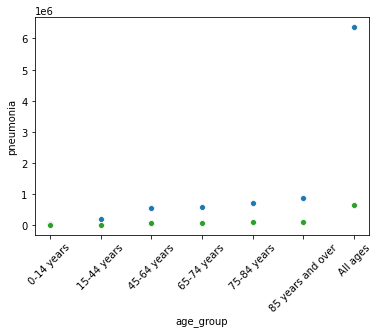

In [99]:

sns.scatterplot(data = tdf, x='age_group', y='total_deaths')
sns.scatterplot(data = tdf, x='age_group', y='pneumonia')
sns.scatterplot(data = tdf, x='age_group', y='pneumonia')
plt.xticks(rotation = 45)
plt.show()